In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


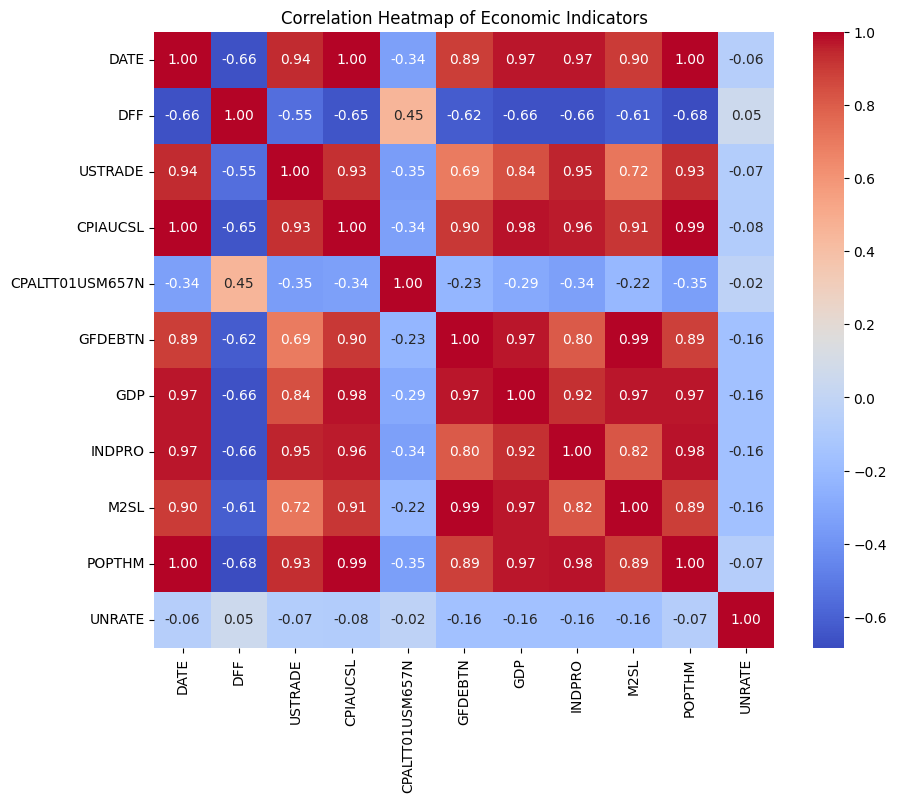

In [13]:
df = pd.read_csv('../Datasets/Final Datasets/Linear.csv')
df['DATE'] = pd.to_datetime(df['DATE'])

summary_stats = df.describe()
features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Economic Indicators')
plt.show()

Observation: GDP has a strong positive corelation with almost all other features except CPALTT01USM657N, UNRATE and DFF for which the correlations are negative

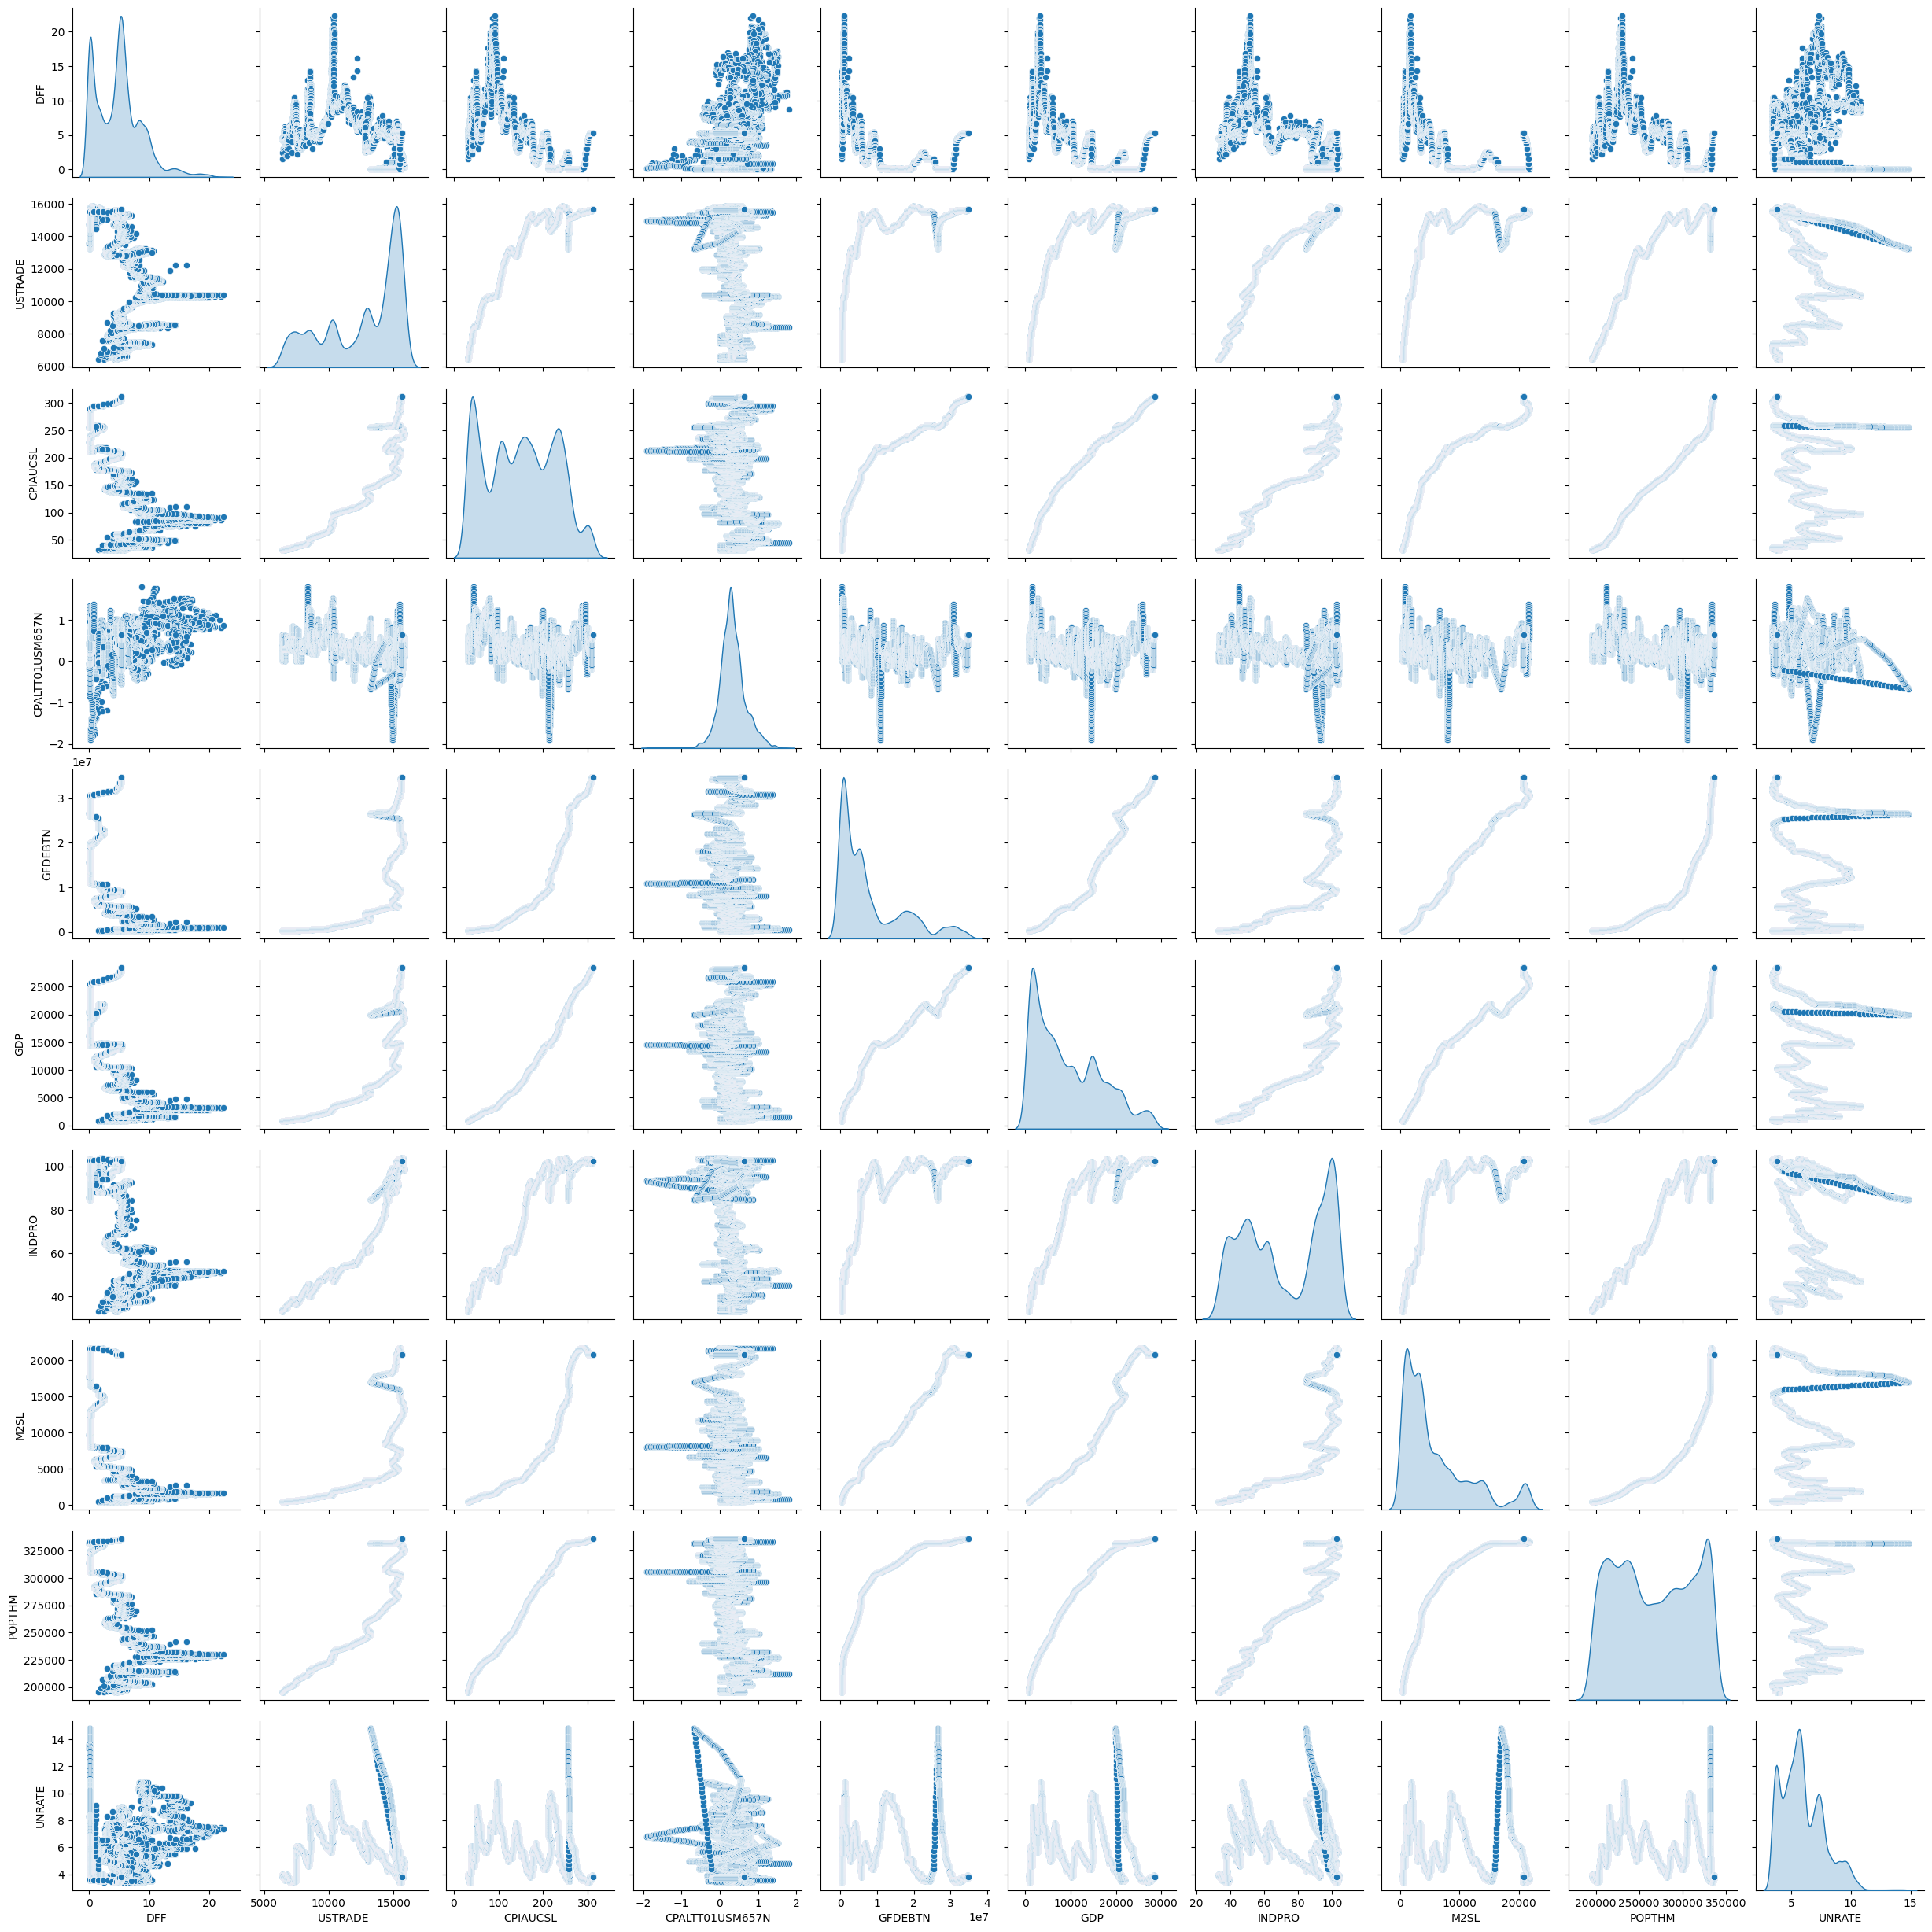

In [14]:
sns.pairplot(df[features], diag_kind='kde') #kde is kernel density estimate
plt.show()

From the pairplots above we can observe that some features have a linear relation for example between GDP and features like POPTHM and CPIAUCSL the plots are linearly increasing. But for other features like UNRATE and INDPRO, the plots are very complex thus indicating that we need to use a complex model like svms or polynomial regression.

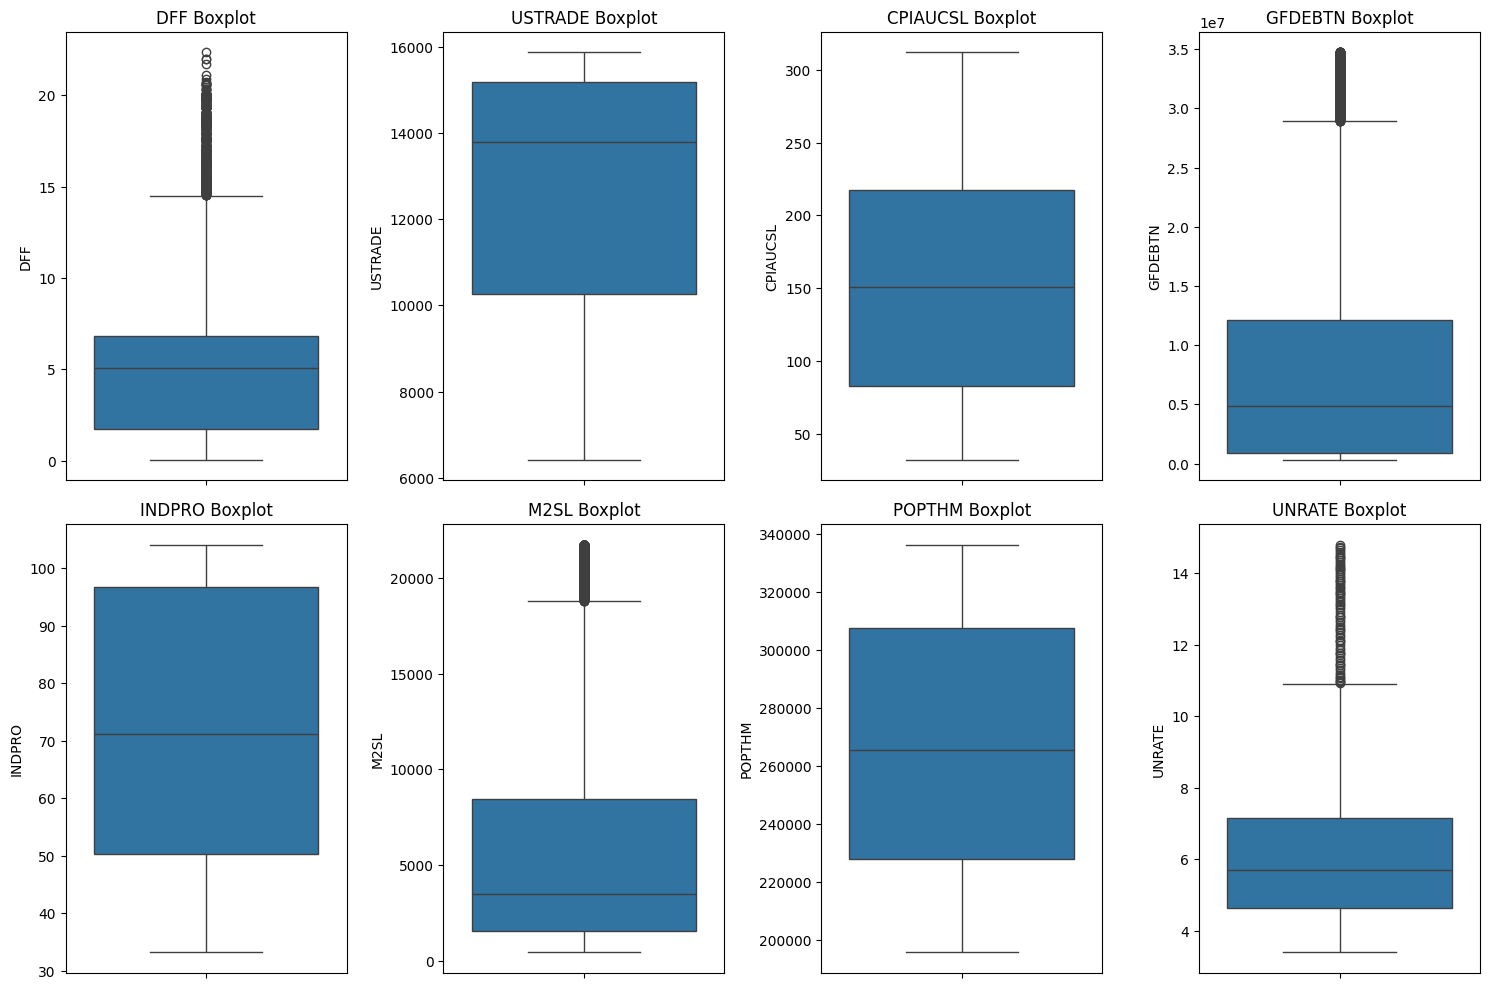

In [15]:

features_to_plot = ['DFF', 'USTRADE', 'CPIAUCSL', 'GFDEBTN', 'INDPRO', 'M2SL', 'POPTHM', 'UNRATE']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[feature])
    plt.title(f'{feature} Boxplot')
plt.tight_layout()
plt.show()

Outliers are present in DFF, GFDEBTN, M2SL, and UNRATE.
The other features:- USTRADE, CPIAUCSL, INDPRO, POPTHM are more symmetrically distributed without significant outliers, indicating more stable data.

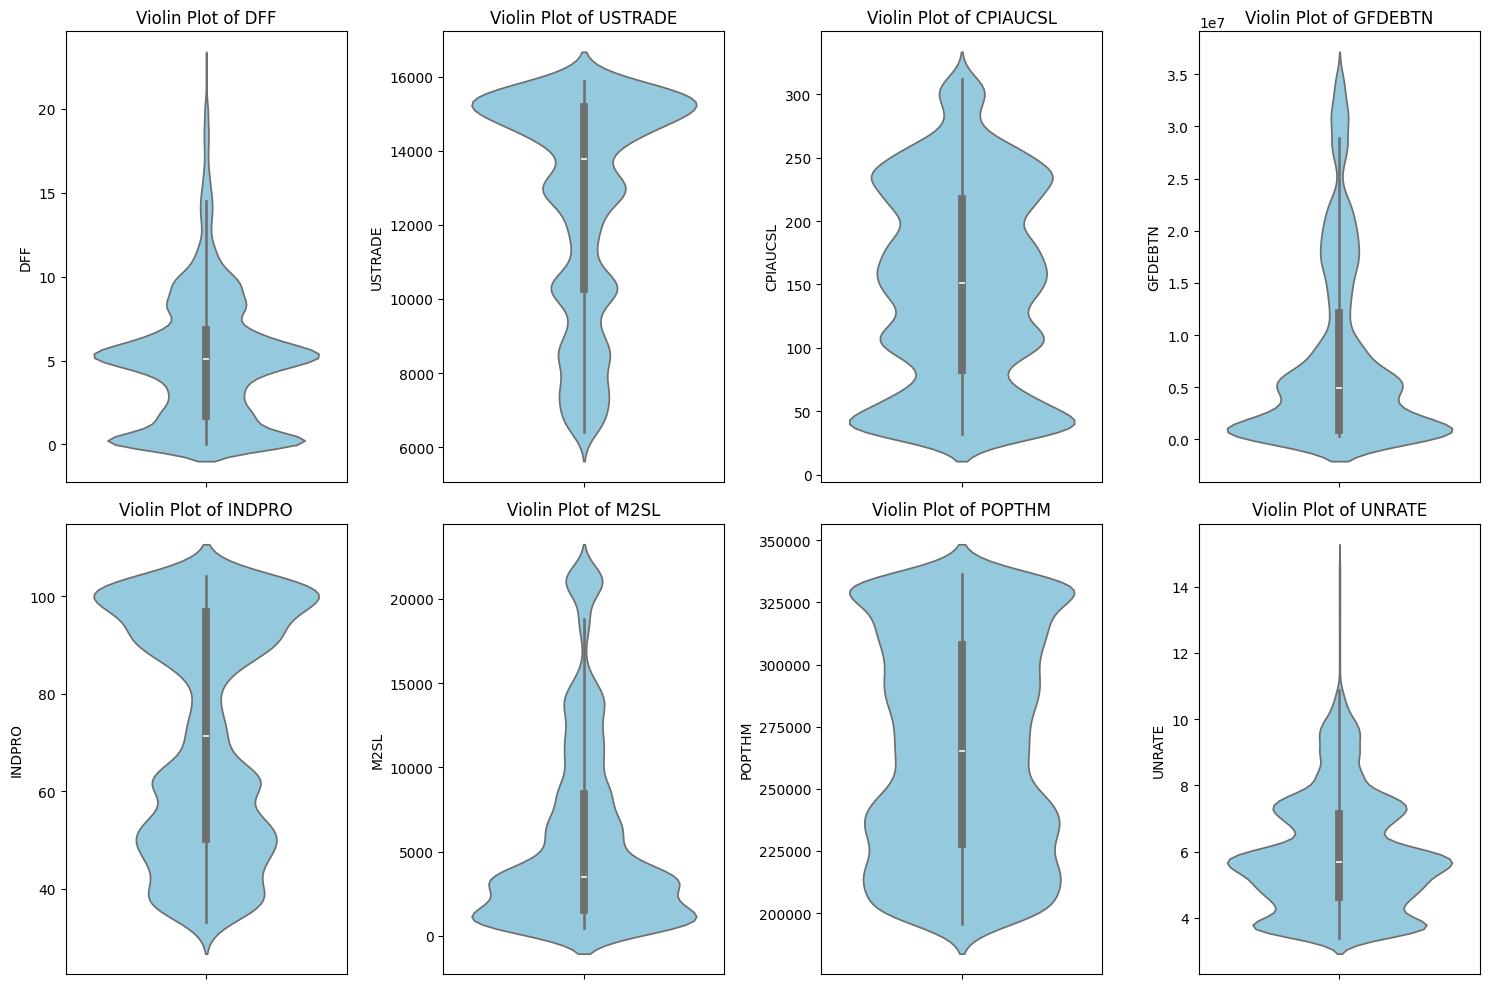

In [16]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 4, i)
    sns.violinplot(y=df[feature], color="skyblue")
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()

Violin plots show how the data points are distributed for a specific feature.

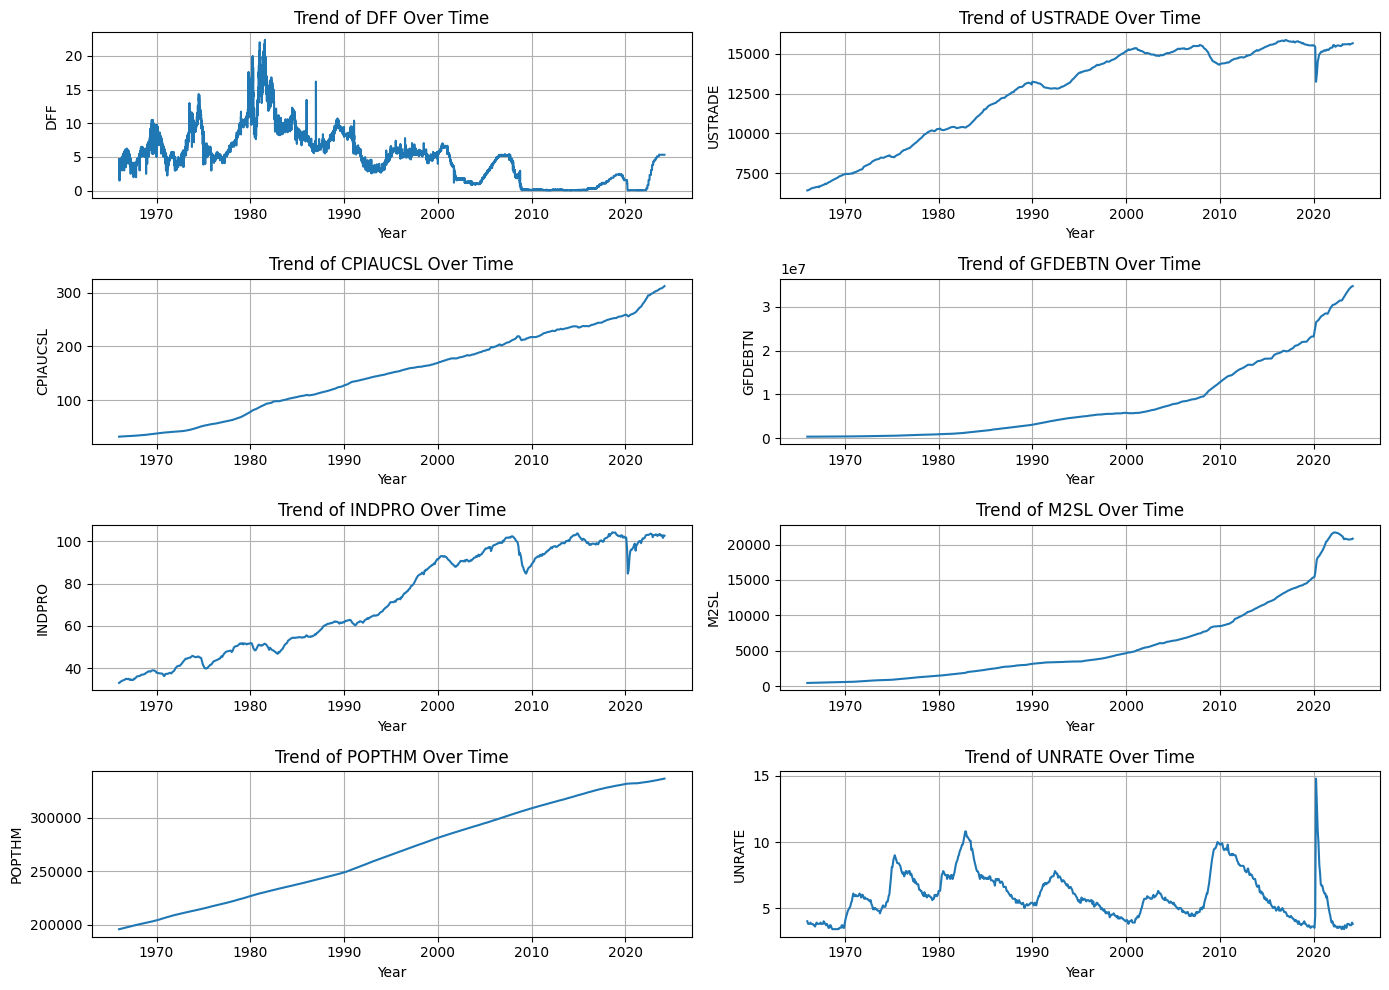

In [17]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4, 2, i)
    plt.plot(df['DATE'], df[feature], label=feature)
    plt.title(f'Trend of {feature} Over Time')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.grid(True)
plt.tight_layout()
plt.show()


From the late 1970s to the early 1980s, there was a significant spike in unemployment (UNRATE), a sharp decline in industrial production (INDPRO), and slower growth in the money supply (M2SL), all of which indicate a period of economic recession. In the early 2000s, unemployment rose temporarily, and industrial production declined slightly, hinting at a mild economic downturn. The late 2000s to early 2010s, however, saw a dramatic rise in unemployment and a severe decline in industrial production, pointing to a deep recession, with GDP likely experiencing a sharp drop during this time. In 2020 (covid pandemic), there is a huge spike in the unemployment rate and there is even a dip in the USTRADE and industrial production (INDPRO) indicating that there was a recession.

In [20]:
from sklearn.feature_selection import mutual_info_regression

X = df[features_to_plot]
y = df['GDP']  
mi_scores = mutual_info_regression(X, y)

mi_scores = pd.Series(mi_scores, index=features_to_plot)
mi_scores = mi_scores.sort_values(ascending=False)

print(mi_scores)

POPTHM      7.659276
M2SL        7.640469
CPIAUCSL    7.426470
GFDEBTN     7.278318
USTRADE     6.223808
INDPRO      5.563051
DFF         3.860172
UNRATE      3.422606
dtype: float64


POPTHM,M2SL,CPIAUCSL, and GFDEBTN are the most important features for predicting GDP, while UNRATE and DFF have the least impact. This suggests that domestic factors and liquidity drive GDP more than labor or interest rates. 